In [1]:
import sys
import sklearn
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np


Dos posibles datasets de Kaggle. Las variables son las mismas, pero el número de datos diferente, por lo que me gustaría probar el modelo con los dos, para comprobar si con más datos generaliza mejor.

1- Red Wine Quality: (1599 filas)
    . La muestra incluye solo vino tinto
    . Sin valores nulos.

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

2- Wine Quality: (6497 filas)
    . La muestra incluye 25% de vino tinto (los mismos que en la muestra anterior) y 75% de vino blanco
    . Contiene algunos valores nulos.

https://www.kaggle.com/datasets/rajyellow46/wine-quality



Se van a utilizar modelos de supervisados. Posiblemente de classificación, pero también voy a probar algunos de regresión

In [2]:
vinos_1 = pd.read_csv('data/winequality-red.csv')

In [3]:
vinos_1['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [22]:
vinos_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
vinos_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

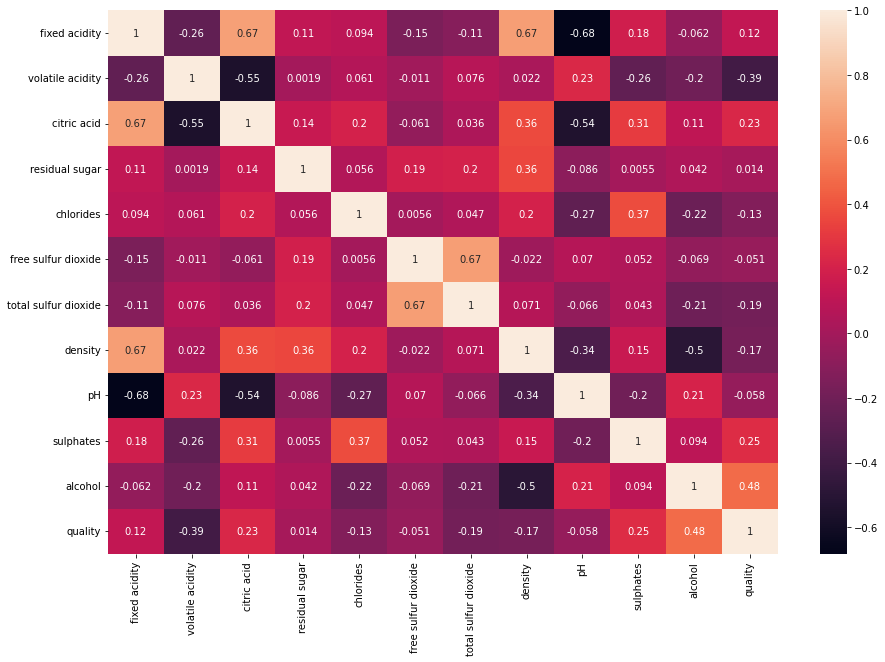

In [24]:

plt.figure(figsize=(15,10))
sns.heatmap(vinos_1.corr(), annot=True)

-------------------

In [2]:

vinos_2 = pd.read_csv('data/winequalityN.csv')

In [3]:
vinos_2['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [13]:
vinos_2.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [20]:
print('Total vinos blanco ',(vinos_2[vinos_2['type']=='white']['type'].count()))
print('Total vinos tinto ',(vinos_2[vinos_2['type']=='red']['type'].count()))

Total vinos blanco  4898
Total vinos tinto  1599


In [16]:
print('Blanco',' fixed acidity',(vinos_2[vinos_2['type']=='white']['fixed acidity'].mean()))
print('Tinto',' fixed acidity',(vinos_2[vinos_2['type']=='red']['fixed acidity'].mean()))
print('-'*50)

print('Blanco',' volatile acidity',(vinos_2[vinos_2['type']=='white']['volatile acidity'].mean()))
print('Tinto',' volatile acidity',(vinos_2[vinos_2['type']=='red']['volatile acidity'].mean()))
print('-'*50)

print('Blanco',' citric acid',(vinos_2[vinos_2['type']=='white']['citric acid'].mean()))
print('Tinto',' citric acid',(vinos_2[vinos_2['type']=='red']['citric acid'].mean()))
print('-'*50)

print('Blanco',' residual sugar',(vinos_2[vinos_2['type']=='white']['residual sugar'].mean()))
print('Tinto',' residual sugar',(vinos_2[vinos_2['type']=='red']['residual sugar'].mean()))
print('-'*50)

print('Blanco',' chlorides',(vinos_2[vinos_2['type']=='white']['chlorides'].mean()))
print('Tinto',' chlorides',(vinos_2[vinos_2['type']=='red']['chlorides'].mean()))
print('-'*50)

print('Blanco',' free sulfur dioxide',(vinos_2[vinos_2['type']=='white']['free sulfur dioxide'].mean()))
print('Tinto',' free sulfur dioxide',(vinos_2[vinos_2['type']=='red']['free sulfur dioxide'].mean()))
print('-'*50)

print('Blanco',' total sulfur dioxide',(vinos_2[vinos_2['type']=='white']['total sulfur dioxide'].mean()))
print('Tinto',' total sulfur dioxide',(vinos_2[vinos_2['type']=='red']['total sulfur dioxide'].mean()))
print('-'*50)

print('Blanco',' density',(vinos_2[vinos_2['type']=='white']['density'].mean()))
print('Tinto',' density',(vinos_2[vinos_2['type']=='red']['density'].mean()))
print('-'*50)

Blanco  fixed acidity 6.855531697341513
Tinto  fixed acidity 8.32210394489668
--------------------------------------------------
Blanco  volatile acidity 0.2782518912287875
Tinto  volatile acidity 0.5277377972465582
--------------------------------------------------
Blanco  citric acid 0.3342504084967321
Tinto  citric acid 0.2711451814768461
--------------------------------------------------
Blanco  residual sugar 6.3932495915032685
Tinto  residual sugar 2.53880550343965
--------------------------------------------------
Blanco  chlorides 0.045778390522875814
Tinto  chlorides 0.08746654158849279
--------------------------------------------------
Blanco  free sulfur dioxide 35.30808493262556
Tinto  free sulfur dioxide 15.874921826141339
--------------------------------------------------
Blanco  total sulfur dioxide 138.36065741118824
Tinto  total sulfur dioxide 46.46779237023139
--------------------------------------------------
Blanco  density 0.9940273764801959
Tinto  density 0.996746

In [15]:
print('Blanco',' pH',(vinos_2[vinos_2['type']=='white']['pH'].mean()))
print('Tinto',' pH',(vinos_2[vinos_2['type']=='red']['pH'].mean()))
print('-'*50)

print('Blanco',' sulphates',(vinos_2[vinos_2['type']=='white']['sulphates'].mean()))
print('Tinto',' sulphates',(vinos_2[vinos_2['type']=='red']['sulphates'].mean()))
print('-'*50)

print('Blanco',' alcohol',(vinos_2[vinos_2['type']=='white']['alcohol'].mean()))
print('Tinto',' alcohol',(vinos_2[vinos_2['type']=='red']['alcohol'].mean()))
print('-'*50)

print('Blanco',' quality',(vinos_2[vinos_2['type']=='white']['quality'].mean()))
print('Tinto',' quality',(vinos_2[vinos_2['type']=='red']['quality'].mean()))

Blanco  pH 3.188202821508894
Tinto  pH 3.3108641202254225
--------------------------------------------------
Blanco  sulphates 0.48983455882352944
Tinto  sulphates 0.6580776455854727
--------------------------------------------------
Blanco  alcohol 10.51426704777011
Tinto  alcohol 10.422983114446529
--------------------------------------------------
Blanco  quality 5.87790935075541
Tinto  quality 5.6360225140712945


In [9]:
vinos_2[vinos_2['type']=='red']['fixed acidity'].mean()

8.32210394489668

In [26]:
vinos_2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
vinos_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<AxesSubplot:>

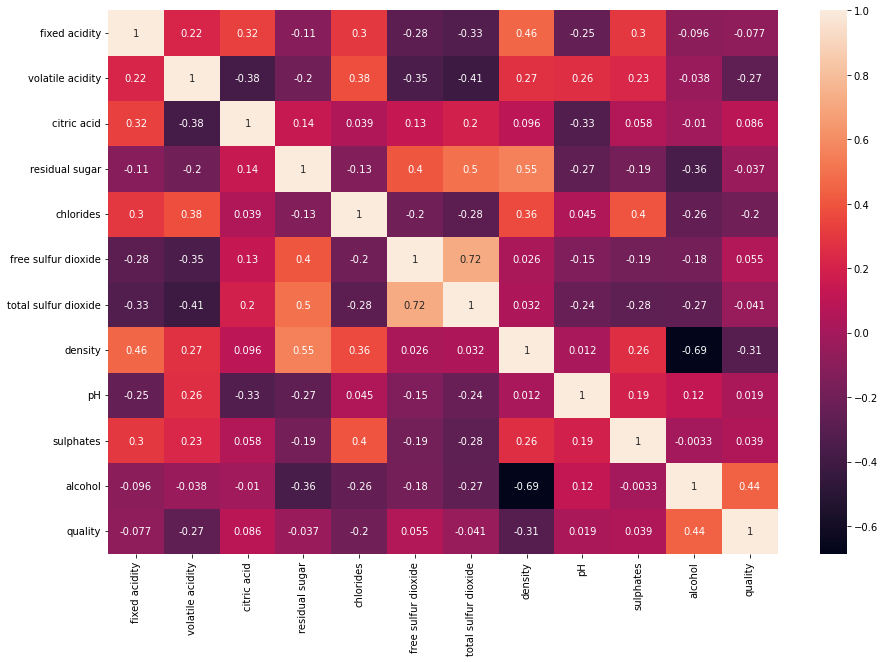

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(vinos_2.corr(), annot=True)

----------------------

Data (1599 filas)

Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [52]:
vinos_1.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
X = vinos_1.iloc[:,:-1]
y = vinos_1['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
vinos_1['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

accuracy_1= accuracy_score(y_test, y_pred)

print('Accuracy', accuracy_1)


Accuracy 0.56875


-------------
-------------

Data (6497 filas)

Decision Tree Classifier